In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
import scipy.io
from scipy import signal

import IPython

def cm_to_inch(value):
    return value/2.54

Quantidade de amostras: 110250
Frequencia de amostragem do sinal: 22050


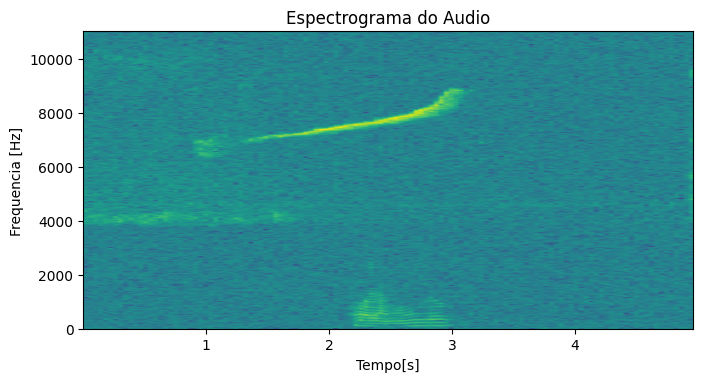

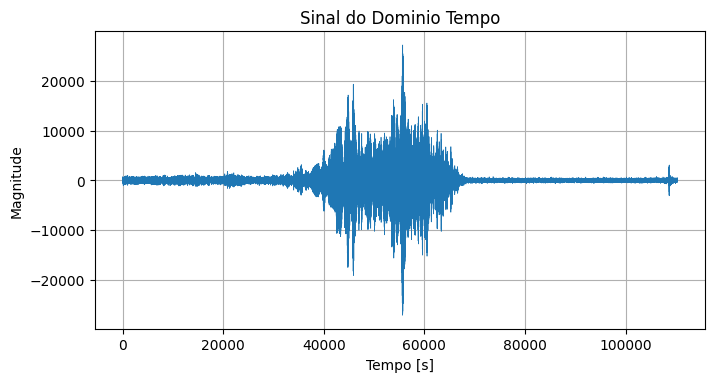

In [22]:
fs, data = scipy.io.wavfile.read('UnknownSound.wav')

print(f'Quantidade de amostras: {int(len(data))}')
print(f'Frequencia de amostragem do sinal: {fs}')

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
Pxx, freqs, bins, im = plt.specgram(data, NFFT=1024, Fs=fs)
plt.title('Espectrograma do Audio')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequencia [Hz]')

time = np.arange(0,len(data))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.plot(time, data, linewidth=0.5)
plt.title('Sinal do Dominio Tempo')
plt.grid()
plt.xlabel('Tempo [s]')
plt.ylabel('Magnitude')

plt.show()

# a)

De acordo com Richard G. Lyons (Understandind Digital Signal Processing Third Edition) a relação entre a frequência antiga (fs = 22050) para a frequência de dizimação (*downsampling*) é:

<br>

$fs_{new} = \frac{fs}{M}$

<br>

Onde $M$ é o fator para realizar a dizimação.

Tamanho da amostra: 4410


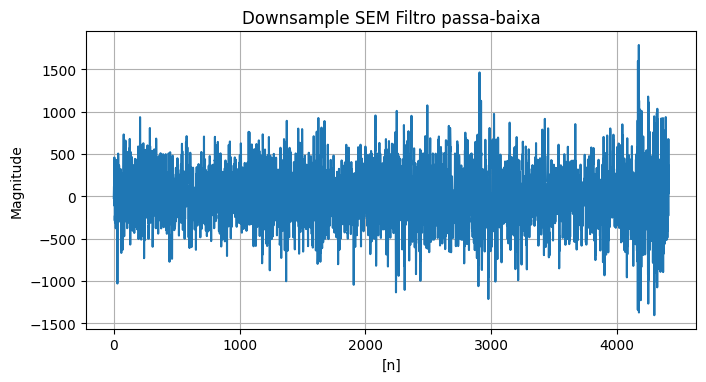

In [56]:
M = 5

fs_new = fs / M

f1 = np.linspace(0, fs_new/2, int(len(data)/2+1))

x = 0
aux_data = []
for i in range(0, int(len(data)/5), M):
    aux_data.append(data[i])
    x = i

data_down = np.array(aux_data)
print(f'Tamanho da amostra: {len(data_down)}')
        
time = np.arange(0,len(data_down))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.plot(time, data_down)
plt.title("Downsample SEM Filtro passa-baixa")
plt.xlabel('[n]')
plt.ylabel('Magnitude')
plt.grid()

# b)

Será utilizado a função Resample da biblioteca Scipy. A função irá passar o filtro passa-baixa para depois realizar a subamostragem para que a frequência mais alta não seja "espalhada" para os outros pontos

Tamanho da amostra: 4410


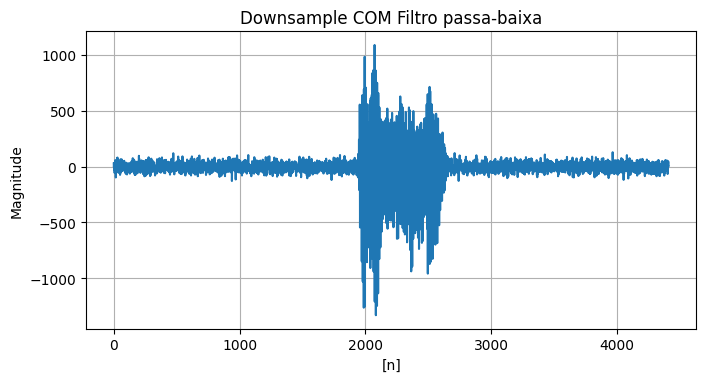

In [57]:
data_down_res = signal.resample(data, int(fs/5))

time = np.arange(0,len(data_down_res))

print(f'Tamanho da amostra: {len(data_down_res)}')

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.plot(time, data_down_res)
plt.title("Downsample COM Filtro passa-baixa")
plt.xlabel('[n]')
plt.ylabel('Magnitude')
plt.grid()

# c)

A discrepância ocorreu por causa que a realizar a subamostragem po $M=5$, a maior frequência que será amostrada corretamente será.

<br>

$\Omega_s = 2\Omega_n$

<br>

Onde $\Omega_s$ é a frequência da amostra e $2\Omega$ é a frequência de Nyquist ou Taxa de Nyquist, o qual é a taxa de amostragem do Sistema. Em suma, para o sistema captar a maior frequência do sinal $f_{max}$ a taxa de amostragem do sistema $f_s$ deve ser no minímo $2*f_{max}$. Se não respeitar essa taxa, haverá frequências desconhecidas ao realizar a subamostragem, pois as frequências masiores irão se "espalhar" nas amostras bagunçando-as. 

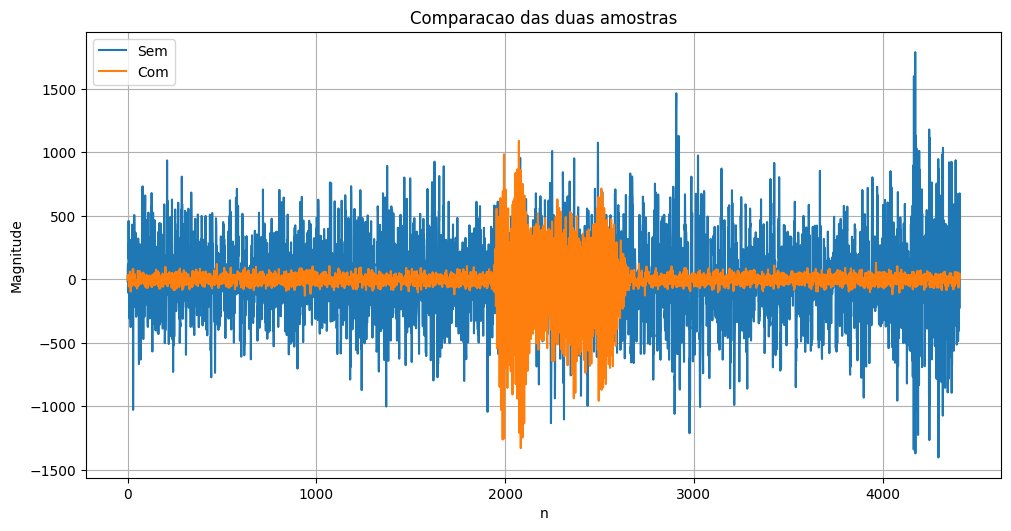

In [48]:
figure(figsize=(cm_to_inch(30), cm_to_inch(15)), dpi=100)
plt.plot(time, data_down, label='Sem')
plt.plot(time, data_down_res, label='Com')
plt.legend()
plt.title('Comparacao das duas amostras')
plt.xlabel('[n]')
plt.ylabel('Magnitude')
plt.grid()

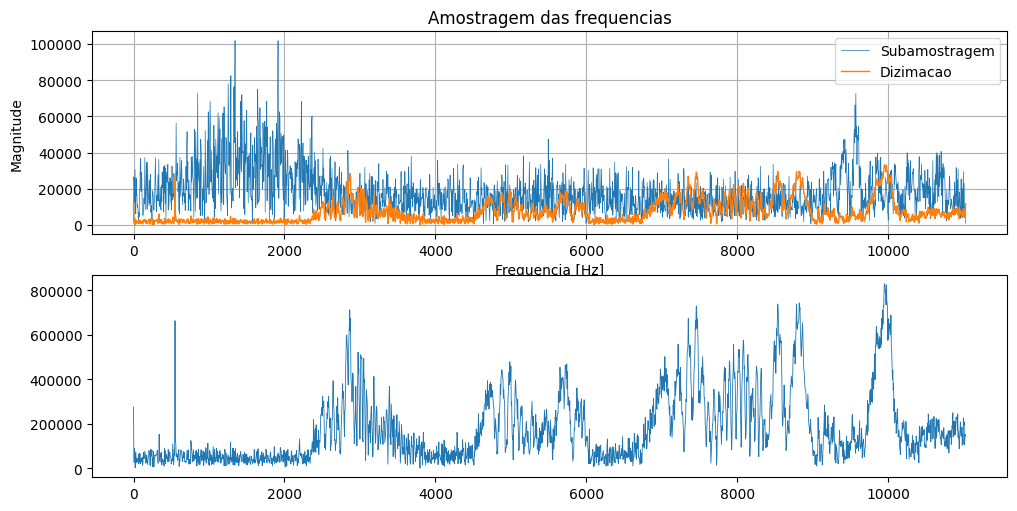

In [94]:
dt_diz = fft(data_down_res)
dt_sub = fft(data_down)
dt_fft = fft(data)

#dt_diz = fftshift(dt_diz)
#dt_sub = fftshift(dt_sub)
#dt_fft = fftshift(dt_fft)

NSamples = len(dt_diz);
nfft = NSamples;
f = np.linspace(0, int(fs/2), int(nfft/2+1))

figure(figsize=(cm_to_inch(30), cm_to_inch(15)), dpi=100)
plt.subplot(2,1,1)
plt.plot(f, np.abs(dt_sub[0:len(f)]), linewidth=0.5, label='Subamostragem')
plt.plot(f, np.abs(dt_diz[0:len(f)]), linewidth=1, label='Dizimacao')
plt.grid()
plt.legend()
plt.title('Amostragem das frequencias')
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Magnitude')

plt.subplot(2,1,2)
plt.plot(f, np.abs(dt_fft[0:len(f)]), linewidth=0.6, label='Raw')